In [67]:
import numpy as np
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import math

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


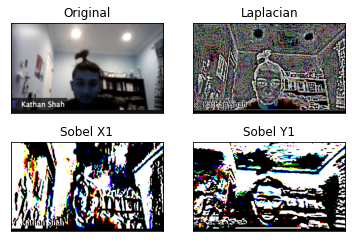

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


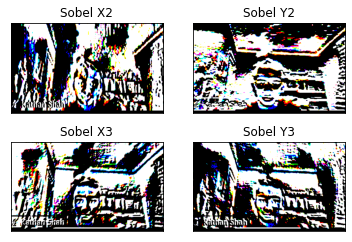

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


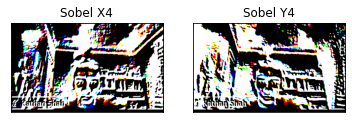

In [68]:
img = cv.imread('TestImg.jpg')
laplacian = cv.Laplacian(img,cv.CV_64F)

"""first set of four directions"""
sobelx1 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=1)
sobely1 = cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=1)
sobelx2 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=-1)
sobely2 = cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=-1)

"""second set of four directions"""
sobelx3 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=math.sqrt(2)/2)
sobely3 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=-math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=math.sqrt(2)/2)
sobelx4 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=-math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0, 1,ksize=5, scale=-math.sqrt(2)/2)
sobely4 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0, 1,ksize=5, scale=-math.sqrt(2)/2)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx1,cmap = 'gray')
plt.title('Sobel X1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely1,cmap = 'gray')
plt.title('Sobel Y1'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(2,2,1),plt.imshow(sobelx2,cmap = 'gray')
plt.title('Sobel X2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely2,cmap = 'gray')
plt.title('Sobel Y2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx3,cmap = 'gray')
plt.title('Sobel X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely3,cmap = 'gray')
plt.title('Sobel Y3'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(2,2,1),plt.imshow(sobelx4,cmap = 'gray')
plt.title('Sobel X4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely4,cmap = 'gray')
plt.title('Sobel Y4'), plt.xticks([]), plt.yticks([])
plt.show()

In [69]:
"""Need to figure out dimensions of Kernel -> not specified in paper (until page 3)"""
sd1 = 2.55
sd2 = 3*sd1
sd3 = 5*sd1
size = 8
retval = cv.getGaussianKernel(size, sd1)

In [77]:
#dst=cv.sepFilter2D(src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType]]]])
def convolutionCalc(img, retval=retval): 
    dst = cv.filter2D(img, -1, retval)
    retval = cv.getGaussianKernel(size, math.sqrt(sd2 - sd1))
    dst = cv.filter2D(dst, -1, retval)
    retval = cv.getGaussianKernel(size, math.sqrt(sd3 - sd2))
    dst = cv.filter2D(dst, -1, retval)
    return dst

In [78]:
convx1 = convolutionCalc(sobelx1)
convy1 = convolutionCalc(sobely1)

convx2 = convolutionCalc(sobelx2)
convy2 = convolutionCalc(sobely2)

convx3 = convolutionCalc(sobelx3)
convy3 = convolutionCalc(sobely3)

convx4 = convolutionCalc(sobelx4)
convy4 = convolutionCalc(sobely4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


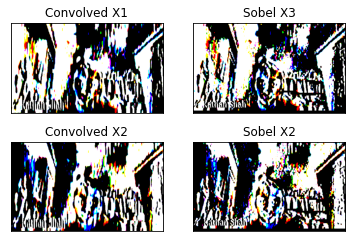

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


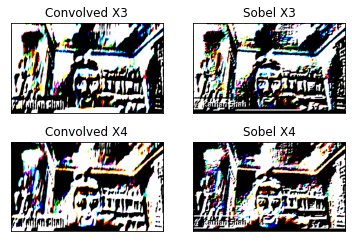

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


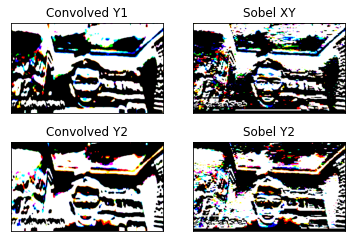

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


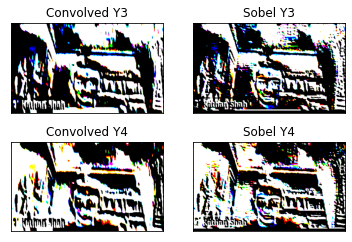

In [79]:
plt.subplot(2,2,1), plt.imshow(convx1,cmap = 'gray')
plt.title('Convolved X1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx1, cmap = 'gray')
plt.title('Sobel X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convx2,cmap = 'gray')
plt.title('Convolved X2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx2,cmap = 'gray')
plt.title('Sobel X2'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(2,2,1), plt.imshow(convx3,cmap = 'gray')
plt.title('Convolved X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx3, cmap = 'gray')
plt.title('Sobel X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convx4,cmap = 'gray')
plt.title('Convolved X4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx4,cmap = 'gray')
plt.title('Sobel X4'), plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(2,2,1), plt.imshow(convy1,cmap = 'gray')
plt.title('Convolved Y1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely1, cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convy2,cmap = 'gray')
plt.title('Convolved Y2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely2,cmap = 'gray')
plt.title('Sobel Y2'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(2,2,1), plt.imshow(convy3,cmap = 'gray')
plt.title('Convolved Y3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely3, cmap = 'gray')
plt.title('Sobel Y3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convy4,cmap = 'gray')
plt.title('Convolved Y4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely4,cmap = 'gray')
plt.title('Sobel Y4'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
!pip install opencv-python

     |████████████████████████████████| 52.4 MB 5.5 MB/s eta 0:00:01
